In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_excel('Desktop/BankNiftyFutures_Data5Min (2).xlsx')
data.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [5]:
####  INCLUDE='ALL' GIVES DESCRIPTION OF ALL COLUMNS  ###

In [6]:
data.describe(include='all')

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
count,91737,91737,9.173700e+04,91737,91737.000000,91737.000000,91737.000000,91737.000000,9.173700e+04,91737.000000
unique,1,1226,NaN,450,NaN,NaN,NaN,NaN,NaN,NaN
top,BANKNIFTY_F1,2018-07-17 00:00:00,NaN,09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,91737,75,NaN,329,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.017057e+07,NaN,22852.481723,22868.809964,22836.145490,22852.631275,5.531416e+04,2016.990952
std,NaN,NaN,1.413046e+04,NaN,4816.167946,4818.059589,4814.411349,4816.300957,6.066659e+04,1.412742
min,NaN,NaN,2.015010e+07,NaN,13449.900400,13559.900400,13406.400400,13445.000000,0.000000e+00,2015.000000
25%,NaN,NaN,2.016033e+07,NaN,18506.000000,18522.250000,18490.099600,18506.150400,1.916000e+04,2016.000000


In [7]:
def calculateVwap(data):
    data['TP'] = (data['High 5']+data['Low 5']+data['Close 5'])/3.0
    data['TradedValue']  = data['TP']*data['Volume 5']
    data['CumVolume'] = data['Volume 5'].cumsum()
    data['CumTradedValue'] = data['TradedValue'].cumsum()
    data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
    return data

calculateVwap(data)
#df = df.groupby('dt').apply(calculateVwap)

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,18823.099600,1.596669e+09,84825,1.596669e+09,18823.099600
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,18822.066400,7.702931e+08,125750,2.366962e+09,18822.763348
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,18826.500000,5.083155e+08,152750,2.875278e+09,18823.423836
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,18816.366533,3.391650e+08,170775,3.214443e+09,18822.678950
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,18795.966133,1.129638e+09,230875,4.344081e+09,18815.725230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91732,BANKNIFTY_F1,2019-12-31,20191231,15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900,2019,32390.600267,6.121823e+08,5074068946,1.207893e+14,23805.210536
91733,BANKNIFTY_F1,2019-12-31,20191231,15:11:00,32390.3496,32390.4004,32382.0000,32382.0000,26820,2019,32384.800133,8.685603e+08,5074095766,1.207901e+14,23805.255885
91734,BANKNIFTY_F1,2019-12-31,20191231,15:16:00,32383.5000,32386.8008,32320.0000,32320.8008,128780,2019,32342.533867,4.165072e+09,5074224546,1.207943e+14,23805.472555
91735,BANKNIFTY_F1,2019-12-31,20191231,15:21:00,32327.8008,32392.6992,32324.4492,32371.6992,80260,2019,32362.949200,2.597450e+09,5074304806,1.207969e+14,23805.607908


In [8]:
### COMBINE DATE AND TIME COLUMN USING PANDAS to_datetime FUNCTION ###

In [9]:
data.loc[:,'DT'] = pd.to_datetime(data.Date.astype(str)+' '+data.Time.astype(str))

In [10]:
data.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,TP,TradedValue,CumVolume,CumTradedValue,VWAP,DT
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,18823.099600,1.596669e+09,84825,1.596669e+09,18823.099600,2015-01-01 09:20:00
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,18822.066400,7.702931e+08,125750,2.366962e+09,18822.763348,2015-01-01 09:25:00
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,18826.500000,5.083155e+08,152750,2.875278e+09,18823.423836,2015-01-01 09:30:00
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,18816.366533,3.391650e+08,170775,3.214443e+09,18822.678950,2015-01-01 09:35:00
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,18795.966133,1.129638e+09,230875,4.344081e+09,18815.725230,2015-01-01 09:40:00


In [11]:
data['DT'].head()

0   2015-01-01 09:20:00
1   2015-01-01 09:25:00
2   2015-01-01 09:30:00
3   2015-01-01 09:35:00
4   2015-01-01 09:40:00
Name: DT, dtype: datetime64[ns]

In [12]:
data['DT'] = pd.to_datetime(data['DT'])

In [13]:
### SET COMBINED DATETIME COLUMN AS INDEX ###

In [14]:
data_2 = data.set_index('DT')
data_2.head()


,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,TP,TradedValue,CumVolume,CumTradedValue,VWAP
DT,,,,,,,,,,,,,,,
2015-01-01 09:20:00,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,18823.099600,1.596669e+09,84825,1.596669e+09,18823.099600
2015-01-01 09:25:00,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,18822.066400,7.702931e+08,125750,2.366962e+09,18822.763348
2015-01-01 09:30:00,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,18826.500000,5.083155e+08,152750,2.875278e+09,18823.423836
2015-01-01 09:35:00,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,18816.366533,3.391650e+08,170775,3.214443e+09,18822.678950
2015-01-01 09:40:00,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,18795.966133,1.129638e+09,230875,4.344081e+09,18815.725230


In [15]:
### DROP THE UNNECESSARY COLUMNS ###

In [16]:
data_2.drop(['Date'], axis=1, inplace=True)
data_2.drop(['Final Date format'], axis=1, inplace=True)
data_2.drop(['Time'], axis=1, inplace=True)
data_2.drop(['Year'], axis=1, inplace=True)

In [17]:
data_2.head(10)

,Ticker,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
DT,,,,,,,,,,,
2015-01-01 09:20:00,BANKNIFTY_F1,18861.3496,18867.9492,18793.0000,18808.3496,84825,18823.099600,1.596669e+09,84825,1.596669e+09,18823.099600
2015-01-01 09:25:00,BANKNIFTY_F1,18808.0000,18835.0000,18802.1992,18829.0000,40925,18822.066400,7.702931e+08,125750,2.366962e+09,18822.763348
2015-01-01 09:30:00,BANKNIFTY_F1,18826.9492,18833.4004,18820.0000,18826.0996,27000,18826.500000,5.083155e+08,152750,2.875278e+09,18823.423836
2015-01-01 09:35:00,BANKNIFTY_F1,18825.0508,18829.0996,18810.0000,18810.0000,18025,18816.366533,3.391650e+08,170775,3.214443e+09,18822.678950
2015-01-01 09:40:00,BANKNIFTY_F1,18805.0000,18808.9492,18775.0000,18803.9492,60100,18795.966133,1.129638e+09,230875,4.344081e+09,18815.725230
2015-01-01 09:45:00,BANKNIFTY_F1,18803.9492,18829.9004,18800.0000,18821.0000,26550,18816.966800,4.995905e+08,257425,4.843671e+09,18815.853281
2015-01-01 09:50:00,BANKNIFTY_F1,18821.0000,18839.0508,18820.0000,18837.0000,22275,18832.016933,4.194832e+08,279700,5.263154e+09,18817.140537
2015-01-01 09:55:00,BANKNIFTY_F1,18837.0000,18850.0000,18830.5508,18846.8008,30750,18842.450533,5.794054e+08,310450,5.842560e+09,18819.647486
2015-01-01 10:00:00,BANKNIFTY_F1,18846.9004,18846.9004,18830.0000,18838.9492,13800,18838.616533,2.599729e+08,324250,6.102532e+09,18820.454804


In [18]:
### THE INTERVAL OF 5 MINUTES IS CONVERTED TO 15 MINUTES USING RESAMPLE FUNCTION AND ADDING THE VALUE FROM REST OF THE RESPECTIVE COLUMNS

In [19]:
df2 = data_2.resample('15T').sum()
df2.head(10)

,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
DT,,,,,,,,,,
2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750,37645.166000,2.366962e+09,210575,3.963632e+09,37645.862948
2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125,56438.832667,1.977118e+09,554400,1.043380e+10,56461.828016
2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575,56491.434267,1.498479e+09,847575,1.594938e+10,56452.641304
2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300,56537.967467,8.914339e+08,1025950,1.931039e+10,56465.735561
2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800,56521.266933,5.237666e+08,1140200,2.146336e+10,56472.622769
2015-01-01 10:30:00,56504.2500,56519.9004,56480.5996,56497.9492,14150,56499.483067,2.664805e+08,1185700,2.232036e+10,56473.878150
2015-01-01 10:45:00,56500.3496,56524.8008,56492.2988,56512.1992,13325,56509.766267,2.510080e+08,1224075,2.304314e+10,56474.810824
2015-01-01 11:00:00,56534.5000,56541.7500,56508.0000,56528.3496,20075,56526.033200,3.782483e+08,1278350,2.406577e+10,56476.940837
2015-01-01 11:15:00,56552.1992,56613.3008,56539.4004,56580.1992,86025,56577.633467,1.622934e+09,1459600,2.748447e+10,56489.812381


In [20]:
data['DT'].head()

0   2015-01-01 09:20:00
1   2015-01-01 09:25:00
2   2015-01-01 09:30:00
3   2015-01-01 09:35:00
4   2015-01-01 09:40:00
Name: DT, dtype: datetime64[ns]

In [21]:
### REMOVE THE COMBINED DATETIME COLUMN FROM INDEX COLUMN

In [22]:
df2.reset_index(inplace=True)

df2.head()

,DT,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750,37645.166000,2.366962e+09,210575,3.963632e+09,37645.862948
1,2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125,56438.832667,1.977118e+09,554400,1.043380e+10,56461.828016
2,2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575,56491.434267,1.498479e+09,847575,1.594938e+10,56452.641304
3,2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300,56537.967467,8.914339e+08,1025950,1.931039e+10,56465.735561
4,2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800,56521.266933,5.237666e+08,1140200,2.146336e+10,56472.622769


In [23]:
### CREATE NEW COLUMNS OF day, month, year, minute, hour FROM DATETIME VALUE

In [24]:
df2['day'] = df2['DT'].dt.day
df2['month'] = df2['DT'].dt.month
df2['year'] = df2['DT'].dt.year
df2['minute'] = df2['DT'].dt.minute
df2['hours'] = df2['DT'].dt.hour

df2.head()

,DT,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP,day,month,year,minute,hours
0,2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750,37645.166000,2.366962e+09,210575,3.963632e+09,37645.862948,1,1,2015,15,9
1,2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125,56438.832667,1.977118e+09,554400,1.043380e+10,56461.828016,1,1,2015,30,9
2,2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575,56491.434267,1.498479e+09,847575,1.594938e+10,56452.641304,1,1,2015,45,9
3,2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300,56537.967467,8.914339e+08,1025950,1.931039e+10,56465.735561,1,1,2015,0,10
4,2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800,56521.266933,5.237666e+08,1140200,2.146336e+10,56472.622769,1,1,2015,15,10


In [25]:
### Creating new DF ONLY USEFUL VALUES and Creating NEW EMPTY COLUMNS

In [26]:
df3 = df2[['DT', 'Close 5', 'High 5', 'Low 5', 'VWAP', 'day', 'month', 'year', 'minute', 'hours']]
df3['close-VWAP'] = ''
df3['buy'] = ''
df3['sell'] = ''
df3.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell
0,2015-01-01 09:15:00,37637.3496,37702.9492,37595.1992,37645.862948,1,1,2015,15,9,,,
1,2015-01-01 09:30:00,56440.0488,56471.4492,56405.0000,56461.828016,1,1,2015,30,9,,,
2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,,,
3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,,,
4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,,,


In [27]:
### FILL THE close-VWAP COLUMN WITH THE RESPECTIVE DIFFERENCES OF CLOSING VALUE AND CALCULATED VWAP

In [28]:
for i in range(0, len(df2)):
    df3['close-VWAP'][i] = df3['Close 5'][i] - df3['VWAP'][i]
df3.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell
0,2015-01-01 09:15:00,37637.3496,37702.9492,37595.1992,37645.862948,1,1,2015,15,9,-8.51335,,
1,2015-01-01 09:30:00,56440.0488,56471.4492,56405.0000,56461.828016,1,1,2015,30,9,-21.7792,,
2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,,
3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,,
4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,,


In [29]:
### NSE (National Stock Exchange) Tick Size is Rs. 0.05

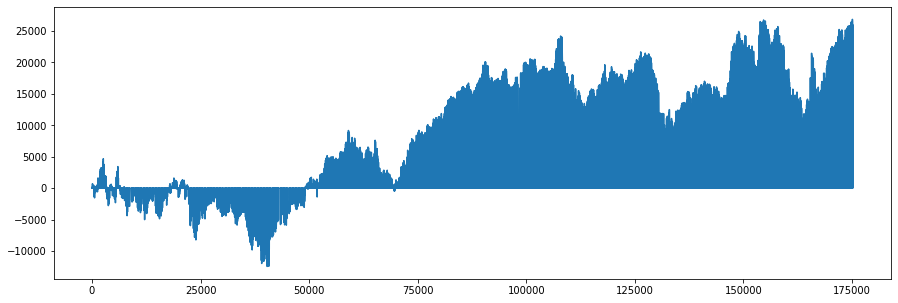

In [30]:
tick = 0.05
plt.figure(figsize=(15,5))
plt.plot(df3['close-VWAP'])

In [31]:
### Drop rows at 9:45 AM

In [32]:
count = 0
for i in range(0, len(df3)):
    
    if df3['hours'][i]==9 and (df3['minute'][i]==15 or df3['minute'][i]==30):
        count+=1
        df3.drop([i], inplace = True)
        
print(count)
df3.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


3652


,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell
2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,,
3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,,
4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,,
5,2015-01-01 10:30:00,56497.9492,56519.9004,56480.5996,56473.878150,1,1,2015,30,10,24.071,,
6,2015-01-01 10:45:00,56512.1992,56524.8008,56492.2988,56474.810824,1,1,2015,45,10,37.3884,,


In [33]:
df4 = df3.reset_index(level = None, drop= False, inplace = False, col_level=0)
df4.head()

,index,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell
0,2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,,
1,3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,,
2,4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,,
3,5,2015-01-01 10:30:00,56497.9492,56519.9004,56480.5996,56473.878150,1,1,2015,30,10,24.071,,
4,6,2015-01-01 10:45:00,56512.1992,56524.8008,56492.2988,56474.810824,1,1,2015,45,10,37.3884,,


In [34]:
### COUNT THE TOTAL NUMBER OF TIMES CLOSING VALUE WAS HIGHER THAN VWAP

In [35]:
c=0
for i in range(0, len(df3)):
    if df4['close-VWAP'][i]>0:
        c+=1
print(c)

21281


In [36]:
### Filling up buy and sell values WITH HIGHTICK AND LOWTICK RESPECTIVELY

In [37]:
for i in range(0, len(df3)):
    if df4['close-VWAP'][i]>0:
        df4['buy'][i] = df4['High 5'][i] + tick
        df4['sell'][i] = 0
    else:
        df4['buy'][i] = 0
        df4['sell'][i] = df4['Low 5'][i] - tick
df4.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,index,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell
0,2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,56519,0
1,3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,56560.9,0
2,4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,56547.1,0
3,5,2015-01-01 10:30:00,56497.9492,56519.9004,56480.5996,56473.878150,1,1,2015,30,10,24.071,56520,0
4,6,2015-01-01 10:45:00,56512.1992,56524.8008,56492.2988,56474.810824,1,1,2015,45,10,37.3884,56524.9,0


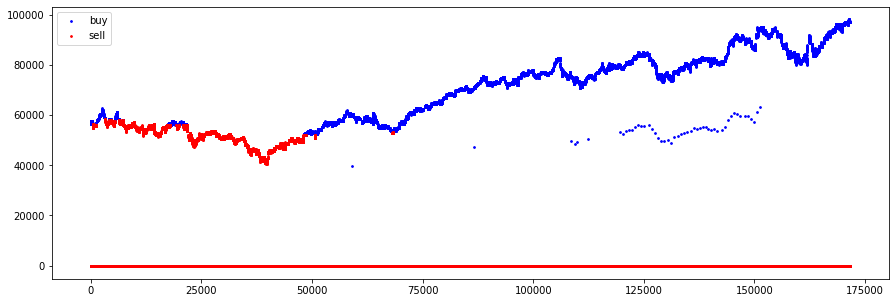

In [38]:
plt.figure(figsize=(15,5))
plt.scatter(df4.index, df4['buy'], color='blue', s=3)
plt.scatter(df4.index, df4['sell'], color='red', s=3)
plt.legend(['buy', 'sell'])

In [39]:
df4['buy'].sum()

1576415405.3688989

In [40]:
df4['sell'].sum()

355174660.0095167

In [41]:
df4['sell'].sum() - df4['buy'].sum()

-1221240745.3593822

In [42]:
### CREATE profit AND loss COLUMN

In [43]:
df4['profit'] = ''
df4['loss'] = ''

In [44]:
df4.head()

,index,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell,profit,loss
0,2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,56519,0,,
1,3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,56560.9,0,,
2,4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,56547.1,0,,
3,5,2015-01-01 10:30:00,56497.9492,56519.9004,56480.5996,56473.878150,1,1,2015,30,10,24.071,56520,0,,
4,6,2015-01-01 10:45:00,56512.1992,56524.8008,56492.2988,56474.810824,1,1,2015,45,10,37.3884,56524.9,0,,


In [45]:
### profit is positive fill LOSS AS 0 AND VICE VERSA

In [46]:
for i in range(0, len(df4)):
    if (df4['sell'][i] - df4['buy'][i])>0:
        df4['profit'][i] = df4['sell'][i] - df4['buy'][i]
        df4['loss'][i] = 0
    elif (df4['sell'][i] - df4['buy'][i])<0:
        df4['profit'][i] = 0
        df4['loss'][i] = df4['buy'][i] - df4['sell'][i]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Us

In [47]:
df4.head()

,index,DT,Close 5,High 5,Low 5,VWAP,day,month,year,minute,hours,close-VWAP,buy,sell,profit,loss
0,2,2015-01-01 09:45:00,56504.8008,56518.9512,56450.5508,56452.641304,1,1,2015,45,9,52.1595,56519,0,0,56519
1,3,2015-01-01 10:00:00,56542.7500,56560.8008,56510.3516,56465.735561,1,1,2015,0,10,77.0144,56560.9,0,0,56560.9
2,4,2015-01-01 10:15:00,56517.6504,56547.0000,56499.1504,56472.622769,1,1,2015,15,10,45.0276,56547.1,0,0,56547.1
3,5,2015-01-01 10:30:00,56497.9492,56519.9004,56480.5996,56473.878150,1,1,2015,30,10,24.071,56520,0,0,56520
4,6,2015-01-01 10:45:00,56512.1992,56524.8008,56492.2988,56474.810824,1,1,2015,45,10,37.3884,56524.9,0,0,56524.9


In [48]:
### Calculate the overall profit and loss. 

In [49]:
print('Profit:', df4['profit'].sum())
print('Loss:  ', df4['loss'].sum())

Profit: 355181829.26100165
Loss:   1576422574.6160653


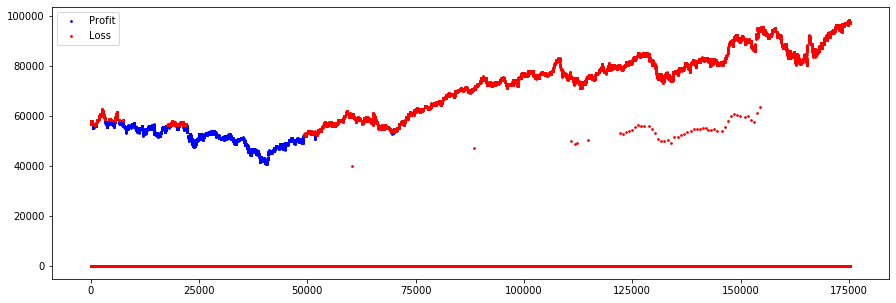

In [50]:
plt.figure(figsize=(15,5))
plt.scatter(df4['index'], df4['profit'], color = 'blue', s = 3)
plt.scatter(df4['index'], df4['loss'], color = 'red', s = 3)
plt.legend(['Profit', 'Loss'])

In [51]:
df4['year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [52]:
### ANNUAL TOTAL PROFIT AND LOSS

In [53]:
p2015 = 0; p2016 = 0; p2017 = 0; p2018 = 0; p2019 = 0;
l2015 = 0; l2016 = 0; l2017 = 0; l2018 = 0; l2019 = 0;

for i in range(0, len(df4)):
    if df4['year'][i]==2015:
        p2015 += df4['profit'][i]
        l2015 += df4['loss'][i]
    elif df4['year'][i]==2016:
        p2016 += df4['profit'][i]
        l2016 += df4['loss'][i]
    elif df4['year'][i]==2017:
        p2017 += df4['profit'][i]
        l2017 += df4['loss'][i]
    elif df4['year'][i]==2018:
        p2018 += df4['profit'][i]
        l2018 += df4['loss'][i]
    elif df4['year'][i]==2019:
        p2019 += df4['profit'][i]
        l2019 += df4['loss'][i]       

In [54]:
x = [1,2,3,4,5]
p = [p2015, p2016, p2017, p2018, p2019]
l = [l2015, l2016, l2017, l2018, l2019]

In [55]:
data = {'PROFIT':[p2015, p2016, p2017, p2018, p2019],
        'LOSS':[l2015, l2016, l2017, l2018, l2019]}

df = pd.DataFrame(data, index =['2015','2016','2017','2018','2019'])
df

,PROFIT,LOSS
2015,2.451658e+08,6.405874e+07
2016,1.100160e+08,1.884668e+08
2017,0.000000e+00,3.929404e+08
2018,0.000000e+00,4.395041e+08
2019,0.000000e+00,4.914526e+08


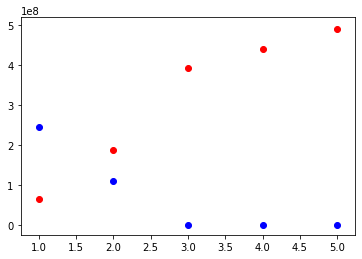

In [56]:
plt.scatter(x,p, color='blue')
plt.scatter(x,l, color='red')

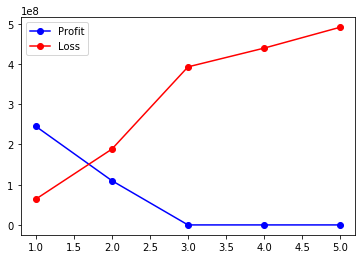

In [57]:
plt.plot(x,p,'o-',color='blue')
plt.plot(x,l,'o-',color='red')
plt.legend(['Profit', 'Loss'])

In [58]:
###########